In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

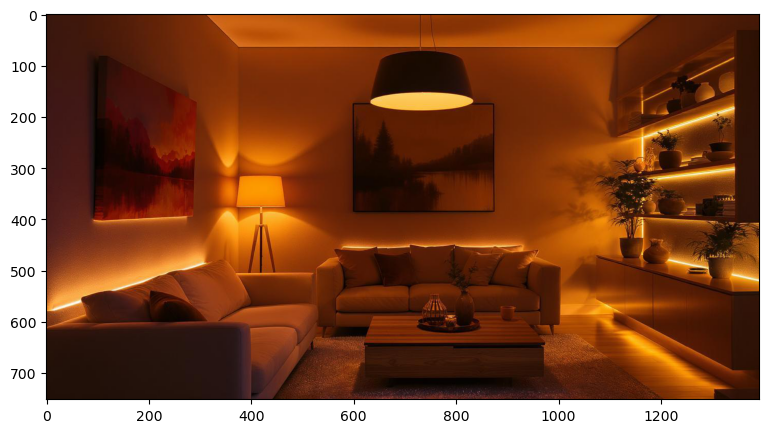

In [2]:
img = cv2.imread('Cozy-Lighting-Hacks-Interior-Designers.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x1a34aba8a50>)

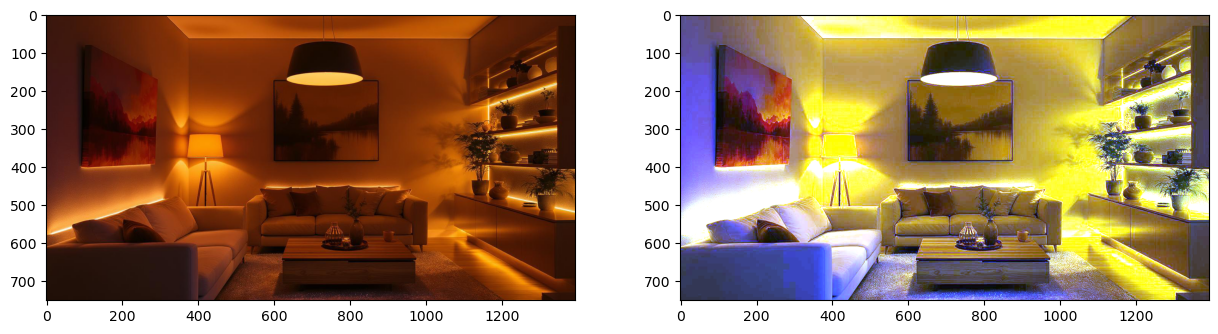

In [3]:
# White patch
row, col = 600, 400 
white = img[row, col, :]
coeffs = 255.0/white

balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x1a34a7534d0>)

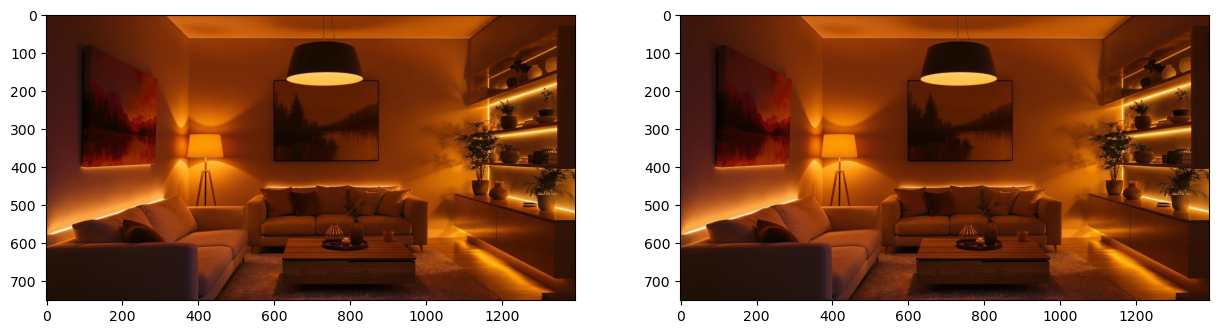

In [4]:
# Scale-by-max
max_r = max(img[:, :, 0].max(), 1)
max_g = max(img[:, :, 1].max(), 1)
max_b = max(img[:, :, 2].max(), 1)

balanced = img.astype(np.float32)
balanced[:, :, 0] *= 255 / max_r
balanced[:, :, 1] *= 255 / max_g
balanced[:, :, 2] *= 255 / max_b
balanced = np.clip(balanced, 0, 255).astype(np.uint8) 

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x1a34b8d9a90>)

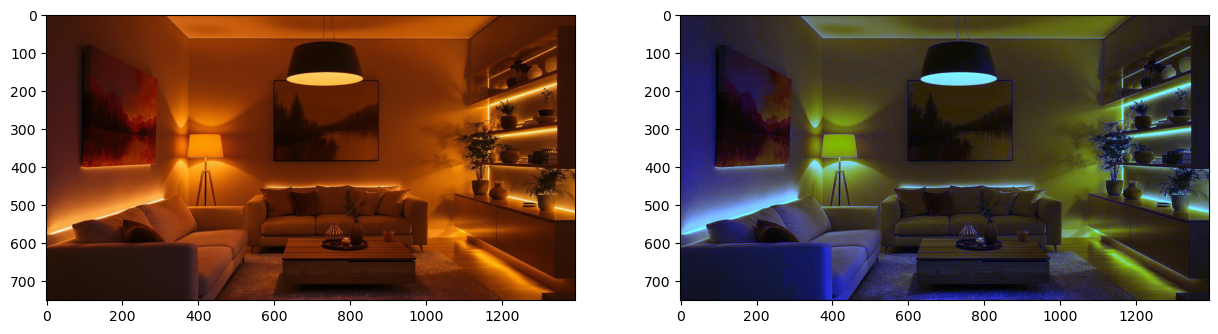

In [5]:
# Gray world
img_float = img.astype(np.float32)

mean_r = np.mean(img_float[:, :, 0])
mean_g = np.mean(img_float[:, :, 1])
mean_b = np.mean(img_float[:, :, 2])

mean_gray = (mean_r + mean_g + mean_b) / 3
kr = mean_gray / mean_r
kg = mean_gray / mean_g
kb = mean_gray / mean_b 

balanced = np.zeros_like(img_float)
balanced[:, :, 0] = img_float[:, :, 0] * kr
balanced[:, :, 1] = img_float[:, :, 1] * kg
balanced[:, :, 2] = img_float[:, :, 2] * kb
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)